# Training notebook

In [1]:
import utils
import model

In [2]:
# set dataset to use
dataset_name = 'facades'

In [3]:
# instantiate datasets and dataloaders
datasets = {mode: utils.ImageDataset(dataset_name = dataset_name, transform=utils.data_transforms[mode], mode = mode) for mode in ['train', 'val']}
dataloaders = {mode: utils.DataLoader(datasets[mode], batch_size=1, shuffle=True) for mode in ['train', 'val']}

In [4]:
# instantiate model
p2p = model.Pix2Pix().to(utils.device)
p2p.train()

Pix2Pix(
  (generator): Generator(
    (conv1): Sequential(
      (0): Conv2d(3, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (1): LeakyReLU(negative_slope=0.3)
    )
    (conv2): Sequential(
      (0): Conv2d(3, 6, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (conv3): Sequential(
      (0): Conv2d(6, 12, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(12, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.3)
    )
    (conv4): Sequential(
      (0): Conv2d(12, 24, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.3)
    )
    (conv5): Sequential(
      (0): Conv2d(24, 24, kernel_size=(4, 4), stride=(2, 2), padding=(

In [5]:
len(dataloaders['train'])

400

In [6]:
len(dataloaders['val'])

100

In [7]:
## In the paper the default number of epoch is 200
utils.train(model = p2p, n_epochs = 1, dataloader = dataloaders['train'])

Epoch 1/1
----------
400/400: [===============================>] - ETA 0.7sss
Loss: 86.0126, generator loss: 16469.6839, discriminator loss: 86.0126.
Training complete in 0m 19s


In [8]:
p2p.eval()

Pix2Pix(
  (generator): Generator(
    (conv1): Sequential(
      (0): Conv2d(3, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (1): LeakyReLU(negative_slope=0.3)
    )
    (conv2): Sequential(
      (0): Conv2d(3, 6, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (conv3): Sequential(
      (0): Conv2d(6, 12, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(12, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.3)
    )
    (conv4): Sequential(
      (0): Conv2d(12, 24, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.3)
    )
    (conv5): Sequential(
      (0): Conv2d(24, 24, kernel_size=(4, 4), stride=(2, 2), padding=(

In [8]:
img, real = next(iter(dataloaders['val']))

In [9]:
img = img.to(utils.device)
real = real.to(utils.device)

In [10]:
out = p2p.generator(img)

In [11]:
img = (img[0]+1)*0.5
real = (real[0]+1)*0.5
out = out[0]
img.shape

torch.Size([3, 256, 256])

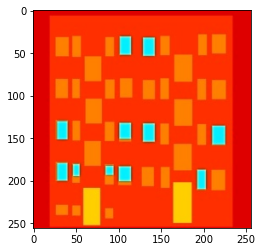

In [12]:
import matplotlib.pyplot as plt
plt.imshow(img.permute(1,2,0).cpu())

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


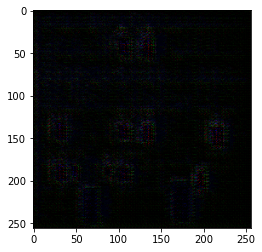

In [13]:
import matplotlib.pyplot as plt
plt.imshow(out.detach().permute(1,2,0).cpu())

In [14]:
out = (out*0.5)+0.5

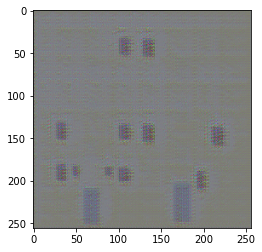

In [15]:
import matplotlib.pyplot as plt
plt.imshow(out.detach().permute(1,2,0).cpu())

In [66]:
real

tensor([[[0.7428, 0.6701, 0.4604,  ..., 0.1877, 0.2943, 0.3021],
         [0.5607, 0.5173, 0.3685,  ..., 0.2446, 0.0806, 0.2195],
         [0.4287, 0.3592, 0.3936,  ..., 0.1213, 0.2519, 0.3164],
         ...,
         [0.2010, 0.2205, 0.3129,  ..., 0.2832, 0.3187, 0.1826],
         [0.2238, 0.2821, 0.3283,  ..., 0.2495, 0.1703, 0.2462],
         [0.3633, 0.3880, 0.4656,  ..., 0.4073, 0.3767, 0.3171]],

        [[0.7506, 0.6701, 0.4595,  ..., 0.2152, 0.3217, 0.3257],
         [0.5803, 0.5370, 0.3766,  ..., 0.2722, 0.1082, 0.2432],
         [0.4551, 0.3855, 0.4180,  ..., 0.1580, 0.2872, 0.3478],
         ...,
         [0.2441, 0.2676, 0.3600,  ..., 0.3278, 0.3541, 0.2061],
         [0.2669, 0.3291, 0.3754,  ..., 0.2940, 0.2057, 0.2697],
         [0.4064, 0.4350, 0.5126,  ..., 0.4518, 0.4121, 0.3407]],

        [[0.7506, 0.6701, 0.4595,  ..., 0.2006, 0.3100, 0.3217],
         [0.5764, 0.5331, 0.3765,  ..., 0.2576, 0.0964, 0.2393],
         [0.4512, 0.3816, 0.4141,  ..., 0.1420, 0.2754, 0.

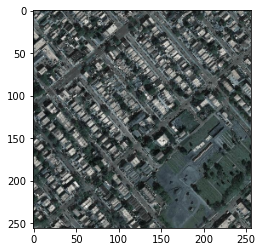

In [67]:
plt.imshow(real.permute(1,2,0).cpu())

In [68]:
img, real = next(iter(maps_dataloader_train))

In [69]:
out = model.generator(img)
img = (img[0]+1)*0.5
real = (real[0]+1)*0.5
out = out[0]
img.shape

torch.Size([3, 256, 256])

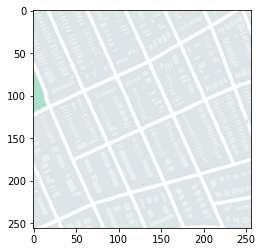

In [70]:
import matplotlib.pyplot as plt
plt.imshow(img.permute(1,2,0).cpu())

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


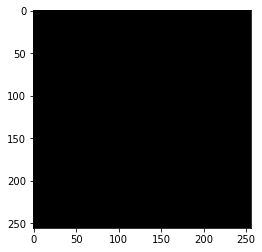

In [71]:
import matplotlib.pyplot as plt
plt.imshow(out.detach().permute(1,2,0).cpu())

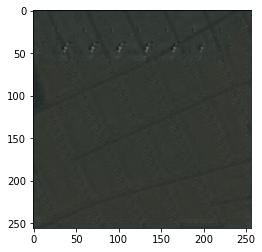

In [72]:
out = (out+1)*0.5
plt.imshow(out.detach().permute(1,2,0).cpu())

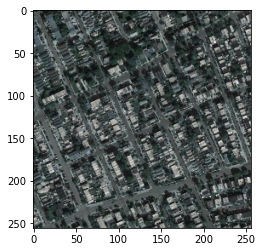

In [73]:
plt.imshow(real.permute(1,2,0).cpu())